In [1]:
# apart from accuracy, the best way to represent the result of evaluating binary classification is using Confusion Matrix


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print("Log Reg score: {:.2f}".format(lr.score(X_test, y_test)))

Log Reg score: 0.98


In [15]:
# using confusion mtrix for same lr model
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_lr)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


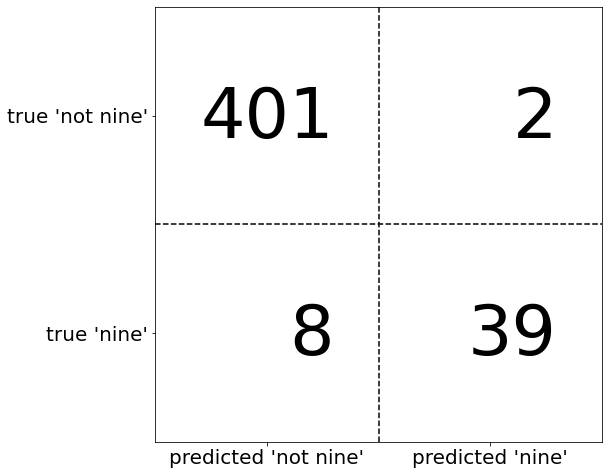

In [16]:
# to understand confusion matrix let's import drawing from mg learn library
import mglearn
mglearn.plots.plot_confusion_matrix_illustration()

In [20]:
# the main diagonal from left to right coresspond to correct classification 
#and other entries class got mistakenly classification as another class
# general rule: more true positiv and more true negative -> less misclassified values

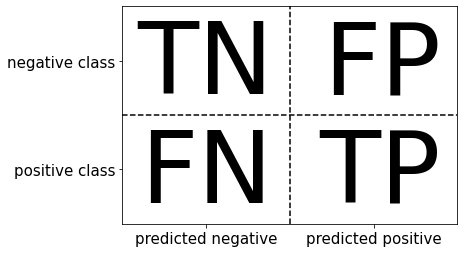

In [17]:
mglearn.plots.plot_binary_confusion_matrix()

In [22]:
# accuracy of confusin matrix
# accuracy = number of correctly predicted / total number of samples
# accuracy = TP+TN/(TP+TP+FP+FN)

In [23]:
# many ways to summarise confusion matrix
# precision, recall and f1-score



In [25]:
# precision
# precision measure how many samples predicted as positive are actuall positive
#precision = TP/(TP+FP)

# recall = TP/(TP+FN)

#  there is a trade off betoeen both of them .i.e f-score
# f = 2* (precision - recall\precision+recall)
# if we take f score, it take consideration between both precision and recall

from sklearn.metrics import f1_score
print("f1 socre of logistic regression: {}".format(f1_score(y_test, pred_lr)))

f1 socre of logistic regression: 0.9213483146067415


In [26]:
# comphrehensive summary of f1 score
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr, target_names = ["not nine","nine"]))


              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [9]:
# uncertainity into account
import mglearn
from mglearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


X, y = make_blobs(n_samples = (400, 50), centers = 2, cluster_std = [7.0, 2], random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state = 0)

svc = SVC(gamma = 0.05).fit(X_train, y_train)

/Users/bikashpokharel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        96
           1       0.75      0.71      0.73        17

    accuracy                           0.92       113
   macro avg       0.85      0.83      0.84       113
weighted avg       0.92      0.92      0.92       113



In [12]:
# need to adjust the precision and recall - the sweert spot(adjust trade off between precision and recall)
# summarise function to return a list of precision and recall values for all possible thresholds
# name of the function is called precision_recall_curve

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

In [14]:
recall

array([1.        , 0.94117647, 0.94117647, 0.94117647, 0.94117647,
       0.94117647, 0.94117647, 0.94117647, 0.94117647, 0.94117647,
       0.94117647, 0.94117647, 0.94117647, 0.94117647, 0.94117647,
       0.94117647, 0.94117647, 0.94117647, 0.94117647, 0.94117647,
       0.94117647, 0.94117647, 0.94117647, 0.94117647, 0.94117647,
       0.94117647, 0.94117647, 0.94117647, 0.94117647, 0.94117647,
       0.94117647, 0.94117647, 0.94117647, 0.88235294, 0.88235294,
       0.88235294, 0.88235294, 0.88235294, 0.88235294, 0.88235294,
       0.88235294, 0.88235294, 0.88235294, 0.88235294, 0.88235294,
       0.88235294, 0.88235294, 0.88235294, 0.88235294, 0.88235294,
       0.88235294, 0.88235294, 0.88235294, 0.88235294, 0.88235294,
       0.88235294, 0.88235294, 0.88235294, 0.88235294, 0.88235294,
       0.88235294, 0.88235294, 0.88235294, 0.88235294, 0.88235294,
       0.88235294, 0.88235294, 0.88235294, 0.88235294, 0.88235294,
       0.88235294, 0.88235294, 0.88235294, 0.88235294, 0.88235

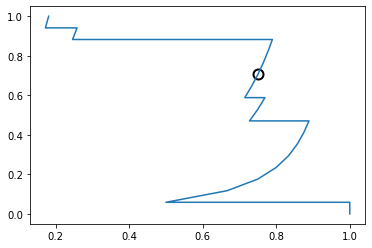

In [16]:
# plotting the curve
import numpy as np
import matplotlib.pyplot as plt
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10, label = "threshold zero", fillstyle = "none", c = 'k', mew = 2)

plt.plot(precision, recall, label = "precision recall curve")



/Users/bikashpokharel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Recall')

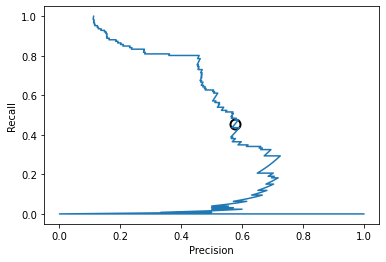

In [17]:
# adding more points to make plot smoother

X, y = make_blobs(n_samples = (4000, 500), centers = 2, cluster_std = [7.0, 2], random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state = 0)


svc = SVC(gamma = 0.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# finding threshold closet to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10, label = "threshold zero", fillstyle = "none", c = 'k', mew = 2)

plt.plot(precision, recall, label = "precision recall curve")

plt.xlabel("Precision")
plt.ylabel("Recall")